# Simple Linear Regression(SLR)

Naman is working as a Research Analyst for a Company and wants to write a research based article on what should a startup focus on intial years in order to grow.

Naman went to 50 startups and met their founder and asked for data anonymously.

How much company spent in Research and Development(RND),Marketing(MKT),Administration(ADMIN),State(STATE) and what was the Profit.

So the data collected is 50Startup's.csv file.(https://www.kaggle.com/code/kavita5/linear-regression-50-startup/data)

Here I am Predicting Profit using only one predictor(SLR) and based on EDA I have selected RND(As higher the amount,the Profit is High).

Load Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
data = pd.read_csv("Downloads/50_Startups.csv")

Read Data

In [2]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Rename Column(Features) Name

In [3]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [4]:
data.columns=['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT']

In [5]:
data.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Exploratory Data Analysis

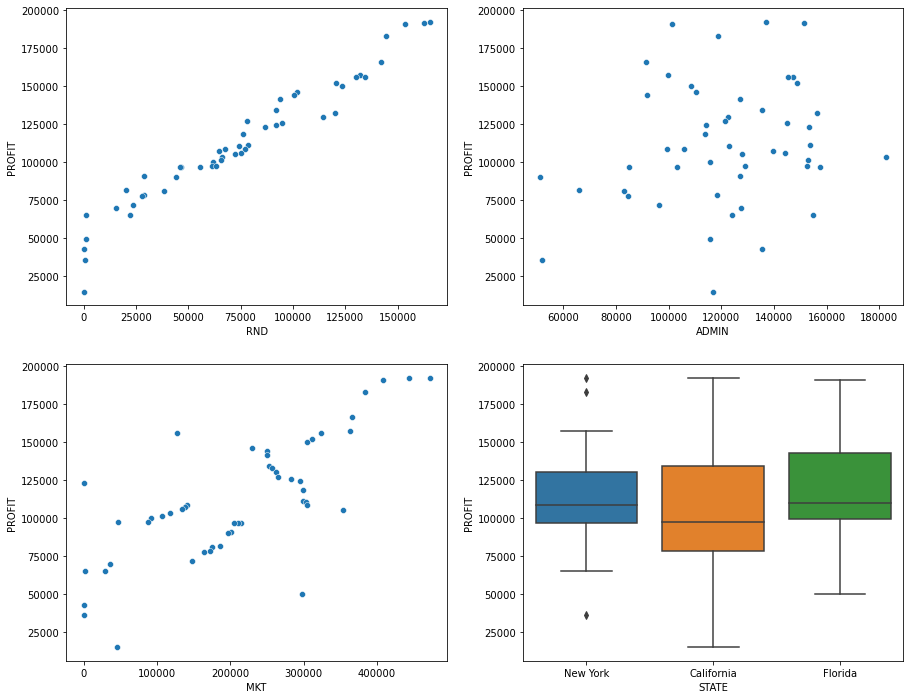

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sb.scatterplot(data.RND,data.PROFIT)
plt.subplot(2,2,2)
sb.scatterplot(data.ADMIN,data.PROFIT)
plt.subplot(2,2,3)
sb.scatterplot(data.MKT,data.PROFIT)
plt.subplot(2,2,4)
sb.boxplot(data.STATE,data.PROFIT)

plt.savefig("Desktop/Naman_research.jpg")

Through EDA we can concluded that investing amount in Research  can bound to give Profit to company.

In [7]:
data.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Check for Null or Missing values

In [8]:
data.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

There is no any Null values

Check Correlation

In [9]:
data.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

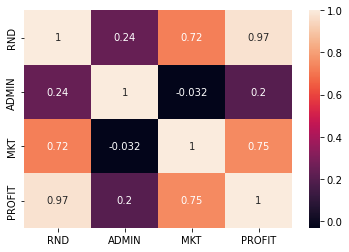

In [10]:
import seaborn as sb
sb.heatmap(data.corr(), annot=True)

Check Correlation with Profit

In [11]:
data.corr()[["PROFIT"]]

,PROFIT
RND,0.972900
ADMIN,0.200717
MKT,0.747766
PROFIT,1.000000


Since Correlation is high of RND ,compared to other features we select RND to predict PROFIT

Define X and Y

Here Y is Our Outcome variable or Column or Feature or Output Value to be Predicted
And X is our Predictor or Feature used for Making Prediction.

In [12]:
X = data[["RND"]]
Y = data[["PROFIT"]]

In [13]:
X.shape

(50, 1)

In [14]:
Y.shape

(50, 1)

Divide Data in training and testing set

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [16]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(40, 1)
(40, 1)
(10, 1)
(10, 1)


Create a ML model

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Train the model

In [18]:
model = lm.fit(xtrain,ytrain)

Fetch values of training results

In [19]:
model.intercept_

array([49320.11362401])

In [20]:
model.coef_

array([[0.856323]])

Equation for SLR is yhat = b0+b1*x

yhat is Predicted value
bo is yintercept(model.intercept_)
b1 is Slope of the Line(model.coef_)

Use retrieved value for making a prediction

In [21]:
RNDamount = int(input("Enter any value for RND: "))
PredictedProfit = 49320.11 + 0.86 * RNDamount
print("Predicted PROFIT: ",PredictedProfit)

Enter any value for RND: 20000
Predicted PROFIT:  66520.11


Calculate Error(COST|LOSS) on Test Data
Approach 1

In [22]:
xtest["b0"] = 49320.11
xtest["b1"] = 0.86
xtest["Actual_PROFIT"]=ytest.PROFIT
xtest["Pred_PROFIT"]=xtest.b0 + xtest.b1*xtest.RND
xtest["Error"]=xtest.Actual_PROFIT - xtest.Pred_PROFIT
xtest['Abs']=xtest.Error.abs()
xtest["Squared"]=xtest.Error*xtest.Error

Mean Absolute Error

In [23]:
xtest.Abs.mean()

6589.73062

Mean Squared Error

In [24]:
xtest.Squared.mean()

68427247.43506503

Approach 2

In [25]:
pred = model.predict(xtest[["RND"]])

In [26]:
pred

array([[160897.39959224],
       [ 68311.42254079],
       [ 62598.02690147],
       [104693.99228   ],
       [152030.2690916 ],
       [180715.60825365],
       [107149.77251449],
       [101672.60213879],
       [130377.21713164],
       [ 49320.11362401]])

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(ytest,pred)

6543.008416944328

In [28]:
mean_squared_error(ytest,pred)

66984231.502244994

Data Visualization-Approach 1

In [29]:
X = data[["RND"]].values
Y = data[["PROFIT"]].values

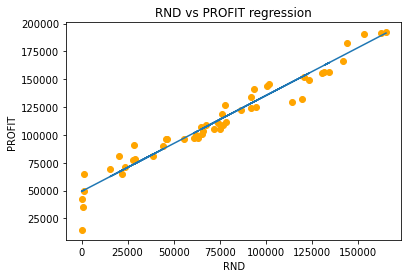

In [30]:
import matplotlib.pyplot as plt
plt.scatter(data.RND,data.PROFIT,c="orange")
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.title("RND vs PROFIT regression")
plt.plot(X,49320.11+0.86*X)

Approach 2


<AxesSubplot:>

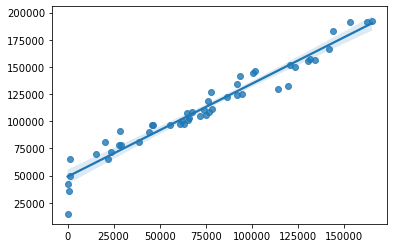

In [31]:
import seaborn as sb
sb.regplot(X,Y)

Story Telling

In [32]:
data = data[["RND","PROFIT"]].copy()

In [33]:
data

,RND,PROFIT
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94
5,131876.90,156991.12
6,134615.46,156122.51
7,130298.13,155752.60
8,120542.52,152211.77
9,123334.88,149759.96


In [34]:
data["PREDICTED_PROFIT"] = model.predict(X)

In [35]:
data

,RND,PROFIT,PREDICTED_PROFIT
0,165349.20,192261.83,190912.437113
1,162597.70,191792.06,188556.264371
2,153441.51,191050.39,180715.608254
3,144372.41,182901.99,172949.529307
4,142107.34,166187.94,171009.897763
5,131876.90,156991.12,162249.336660
6,134615.46,156122.51,164594.428583
7,130298.13,155752.60,160897.399592
8,120542.52,152211.77,152543.446341
9,123334.88,149759.96,154934.608442


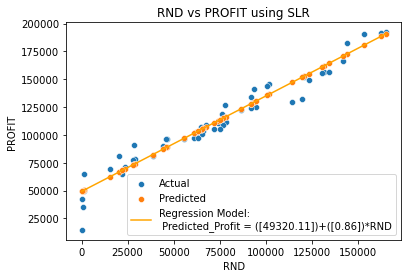

In [36]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.title("RND vs PROFIT using SLR")
label_model = f"Regression Model:\n Predicted_Profit = ({model.intercept_.round(2)})+({model.coef_[0].round(2)})*RND"
sb.scatterplot(data.RND,data.PROFIT,label="Actual")
sb.scatterplot(data.RND,data.PREDICTED_PROFIT,label="Predicted")
sb.lineplot(data.RND,data.PREDICTED_PROFIT,color="orange",label=label_model)
plt.savefig("Desktop/PredictedProfitusingSLR.jpg")

R2_Score(Metrics Used for SLR) Best Value is 1

In [37]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.9622570223025136